# Part 6: Time Series Forecast
In this part, we attempted to forecast of a time series of low CO2 vehicles share percentage.
Key steps:
1. Importing libraries and clustering results.
2. Resampling from yearly to monthly rate data with assumption of same monthly sales.
3. Monthly rate data analyses, making time series object stationary.
4. Applying SARIMAX analyses for forecasting
5. Recalculating back to a yearly rate.

## 1. Importing libraries

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/Users/shamil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/shamil/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#%cd K means samples

## 2. Loading K-means clustering results from 30 computations.

In [4]:
df_input = pd.read_csv('K_means_share_CO2_car_percentage_21feb_30_samples.csv')
df_input = df_input.drop('Unnamed: 0', axis=1)

In [5]:
# Let's create 2 columns with date of year start and end
df_input["year_end"] = df_input["year"].apply(lambda row: f'12/31/{row}')
df_input["year"] = df_input["year"].apply(lambda row: f'01/01/{row}')

In [6]:
columns = ['perc_share_low_CO2_kmeans_1',
       'perc_share_low_CO2_kmeans_2', 'perc_share_low_CO2_kmeans_3',
       'perc_share_low_CO2_kmeans_4', 'perc_share_low_CO2_kmeans_5',
       'perc_share_low_CO2_kmeans_6', 'perc_share_low_CO2_kmeans_7',
       'perc_share_low_CO2_kmeans_8', 'perc_share_low_CO2_kmeans_9',
       'perc_share_low_CO2_kmeans_10', 'perc_share_low_CO2_kmeans_11',
       'perc_share_low_CO2_kmeans_12', 'perc_share_low_CO2_kmeans_13',
       'perc_share_low_CO2_kmeans_14', 'perc_share_low_CO2_kmeans_15',
       'perc_share_low_CO2_kmeans_16', 'perc_share_low_CO2_kmeans_17',
       'perc_share_low_CO2_kmeans_18', 'perc_share_low_CO2_kmeans_19',
       'perc_share_low_CO2_kmeans_20', 'perc_share_low_CO2_kmeans_21',
       'perc_share_low_CO2_kmeans_22', 'perc_share_low_CO2_kmeans_23',
       'perc_share_low_CO2_kmeans_24', 'perc_share_low_CO2_kmeans_25',
       'perc_share_low_CO2_kmeans_26', 'perc_share_low_CO2_kmeans_27',
       'perc_share_low_CO2_kmeans_28', 'perc_share_low_CO2_kmeans_29',
       'perc_share_low_CO2_kmeans_30']

In [7]:
# Averaging the clustering 30 computational results of low Co2 vehciles share per country per year
df_input['average'] = df_input.mean(numeric_only=True, axis=1)

In [8]:
df_input.head(5)

,Country,year,perc_share_low_CO2_kmeans_1,perc_share_low_CO2_kmeans_2,perc_share_low_CO2_kmeans_3,perc_share_low_CO2_kmeans_4,perc_share_low_CO2_kmeans_5,perc_share_low_CO2_kmeans_6,perc_share_low_CO2_kmeans_7,perc_share_low_CO2_kmeans_8,...,perc_share_low_CO2_kmeans_23,perc_share_low_CO2_kmeans_24,perc_share_low_CO2_kmeans_25,perc_share_low_CO2_kmeans_26,perc_share_low_CO2_kmeans_27,perc_share_low_CO2_kmeans_28,perc_share_low_CO2_kmeans_29,perc_share_low_CO2_kmeans_30,year_end,average
0,AT,01/01/2010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12/31/2010,0.000000
1,AT,01/01/2011,0.021227,0.000000,0.000000,0.000000,0.000000,0.000000,0.021622,0.000000,...,0.000000,0.021115,0.020868,0.021218,0.020903,0.000000,0.000000,0.000000,12/31/2011,0.014167
2,AT,01/01/2012,0.056106,0.054855,0.094375,0.018080,0.090285,0.018126,0.092200,0.074864,...,0.036704,0.036576,0.018543,0.037023,0.091558,0.036357,0.073327,0.055046,12/31/2012,0.047128
3,AT,01/01/2013,0.180587,0.115580,0.067084,0.183570,0.161365,0.158550,0.160183,0.222965,...,0.132920,0.203989,0.270758,0.091933,0.183234,0.208285,0.201839,0.113947,12/31/2013,0.170713
4,AT,01/01/2014,0.179732,0.150954,0.121885,0.189573,0.109559,0.122783,0.055664,0.122968,...,0.178694,0.106284,0.109619,0.151934,0.125104,0.134916,0.124069,0.148228,12/31/2014,0.137061


In [9]:
df_input['year'] = pd.to_datetime(df_input['year'])

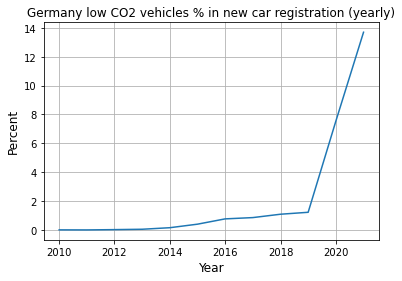

In [10]:
DE_test = df_input[df_input['Country'] == 'DE']
plt.title('Germany low CO2 vehicles % in new car registration (yearly)', fontsize=12)
plt.plot(DE_test['year'], DE_test['average'], label='Germany low CO2 vehicles % in new car registration')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.grid()
plt.show()

## 3. Data resampling 

#### As we have only 12 records in total (from 2010 to 2021), which is not enough for time series analyses, after discussion with instructor we agreed to increase the sample rate by splitting each year by 12 months. We added here seasonal sales per month from
the recent 2021 EU market vehicles analyses (source:https://www.statista.com/statistics/1104622/monthly-car-registrations-europe/). sales_month = [Jan: 0.07, Feb: 0.07, Mar: 0.12, Apr: 0.09, May: 0.09, Jun: 0.11, Jul: 0.08, Aug: 0.06, Sep: 0.08, Oct: 0.07, Nov: 0.07, Dec: 0.09]

In [11]:
# Let's keep the columns in which we are interested in:
df_intermediate = df_input[['Country','year','year_end','average']]

In [12]:
df_intermediate.head(5)

,Country,year,year_end,average
0,AT,2010-01-01,12/31/2010,0.000000
1,AT,2011-01-01,12/31/2011,0.014167
2,AT,2012-01-01,12/31/2012,0.047128
3,AT,2013-01-01,12/31/2013,0.170713
4,AT,2014-01-01,12/31/2014,0.137061


In [13]:
# just to be sure, we convert year columns to datetime format:
df_intermediate['year'] = pd.to_datetime(df_intermediate['year'])
df_intermediate['year_end'] = pd.to_datetime(df_intermediate['year_end'])

In [14]:
# Let's melt our dataframe for further increasing the timedate sample from year to a monthly rate:
df_start_end = df_intermediate.melt(id_vars=['Country', 'average'],value_name='date')

In [15]:
df_start_end.head(5)

,Country,average,variable,date
0,AT,0.000000,year,2010-01-01
1,AT,0.014167,year,2011-01-01
2,AT,0.047128,year,2012-01-01
3,AT,0.170713,year,2013-01-01
4,AT,0.137061,year,2014-01-01


#### Resampling from year to a monthly rate:

In [16]:
df = (
    df_start_end.groupby('Country')
    .apply(lambda x: x.set_index('date')
    .resample('M').ffill())
    .drop(columns=['Country', 'variable'])
    .reset_index()
)

In [17]:
df.head(5)

,Country,date,average
0,AT,2010-01-31,0.0
1,AT,2010-02-28,0.0
2,AT,2010-03-31,0.0
3,AT,2010-04-30,0.0
4,AT,2010-05-31,0.0


In [18]:
# As we have 0 values in our dataframe, to avoid further errors, let's replace them with some small value as 0.01. 
df['average'] = df['average'].replace(to_replace = 0, value = 0.01)

In [19]:
df.head(5)

,Country,date,average
0,AT,2010-01-31,0.01
1,AT,2010-02-28,0.01
2,AT,2010-03-31,0.01
3,AT,2010-04-30,0.01
4,AT,2010-05-31,0.01


In [20]:
# The automotive industry has some definite seasonal trends, 
# we took percentage of sales from https://www.statista.com/statistics/1104622/monthly-car-registrations-europe/ 
# for 2021 and assumed it was the same in the previous years (with this we implement strong seasonal component)
sales_month = [0.07, 0.07, 0.12, 0.09, 0.09, 0.11, 0.08, 0.06, 0.08, 0.07, 0.07, 0.09]

In [21]:
df['monthly_sales_percent'] = np.tile(sales_month, len(df))[:len(df)]

In [22]:
# And as a next step we caluclated the percentage of low CO2 vehicles sales per month by multyplying 
# monthly_sales_percent with average result from K-means per country per month
df['monthly_final_percent'] = df['monthly_sales_percent']*df['average']

In [23]:
df.head(5)

,Country,date,average,monthly_sales_percent,monthly_final_percent
0,AT,2010-01-31,0.01,0.07,0.0007
1,AT,2010-02-28,0.01,0.07,0.0007
2,AT,2010-03-31,0.01,0.12,0.0012
3,AT,2010-04-30,0.01,0.09,0.0009
4,AT,2010-05-31,0.01,0.09,0.0009


#### Plotting monthly rate of low CO2 car vehicles per EU country

In [24]:
base = alt.Chart(df, title = 'Low CO2 vehicles monthly percentage').mark_line().encode(
    x=alt.X('date:T', title = 'Year', axis=alt.Axis(tickMinStep = 20000000000, format="%Y")),
    y = alt.Y('monthly_final_percent:Q', title = 'Monthly percentage', scale=alt.Scale(domain=[0, 20])),
    color = 'Country:N'
    ).properties(height = 400, width = 600)

In [25]:
base

alt.Chart(...)

## 4. Germany low CO2 vehicles share in new registrations analyses

In [26]:
# Filtering the df 
DE = df[df['Country']=='DE']

In [27]:
DE.head(5)

,Country,date,average,monthly_sales_percent,monthly_final_percent
720,DE,2010-01-31,0.003523,0.07,0.000247
721,DE,2010-02-28,0.003523,0.07,0.000247
722,DE,2010-03-31,0.003523,0.12,0.000423
723,DE,2010-04-30,0.003523,0.09,0.000317
724,DE,2010-05-31,0.003523,0.09,0.000317


Changing index to date

In [28]:
DE = DE.reset_index().set_index('date')

In [29]:
DE.head(5)

,index,Country,average,monthly_sales_percent,monthly_final_percent
date,,,,,
2010-01-31,720,DE,0.003523,0.07,0.000247
2010-02-28,721,DE,0.003523,0.07,0.000247
2010-03-31,722,DE,0.003523,0.12,0.000423
2010-04-30,723,DE,0.003523,0.09,0.000317
2010-05-31,724,DE,0.003523,0.09,0.000317


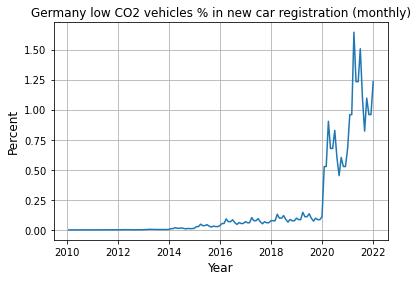

In [30]:
plt.title('Germany low CO2 vehicles % in new car registration (monthly)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percent', fontsize=12)
plt.plot(DE['monthly_final_percent'])
plt.grid()
plt.show()

We see that the varicance, mean are changing through the time (Random Walk Model with Drift), which means the timeseries object is not stationary
Let's compute first difference to detrend the timeseries.

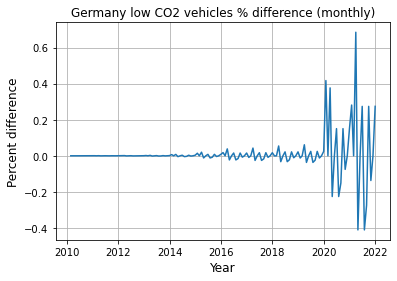

In [31]:
plt.title('Germany low CO2 vehicles % difference (monthly)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percent difference', fontsize=12)
plt.plot(DE['monthly_final_percent'].diff().dropna())
plt.grid()
plt.show()

Mean value remains relaively constant, however variance is increasing with time, our timeseries object (first diff) is still not stationary. 

Another way to check the timeseries object for stationarity is Augmented Dickey Fuller Test.
- Null Hypothesis Ho : The time series is non stationary
- Alternate Hypothesis Ha : The time series is stationary

In [32]:
score = adfuller((DE['monthly_final_percent']).diff().dropna())
print('p-value: ', score[1])

p-value:  0.8736988104657447


p-value is more than 0.05, which means we can't reject Null Hypothesis.

Let's test stationarity on log return values.

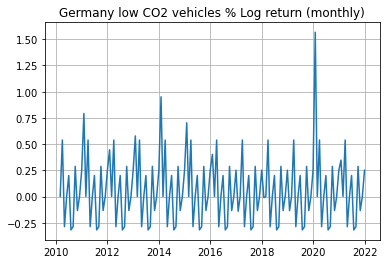

In [33]:
DE_data_log = np.log(DE['monthly_final_percent'])
plt.plot(DE_data_log.diff().dropna())
plt.title('Germany low CO2 vehicles % Log return (monthly)', fontsize=12)
plt.grid()
plt.show()

Now, we see that the log return values are almnost stationary, as the mean and variance remain the same. 

Another requirement for timeseries object to be stationary is a constant variance. Value of the covariance between the two time periods depend on the lag between the two time periods and not on the time at which the covariance is computed. We can check this with autocorrelation plot.

Auto-Correlation Function (ACF) : Auto-correlation of lag k is the correlation between Y(t) and Y(t-k), measured at different k lags. For lag 1, Auto correlation is measured between Y(t) and Y(t-1), similarly for lag 2, Auto correlation is measured between Y(t) and Y(t-2) values. A plot of auto-correlation for different values of k is called an auto-correlation plot or correlogram. 

The blue area is the confidence interval. If one or more spikes are outside this range, or more than 5% of spikes are outside these ranges, then we can infer that the series is not ‘White Noise’.[1]

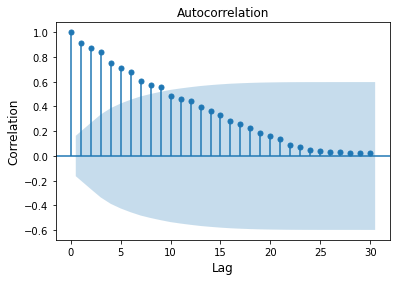

In [34]:
plot_acf(DE['monthly_final_percent'], lags= 30)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.show()

We see significant positive autocorrelation between first 10 lags.

Let's check autocorrelation on log return:

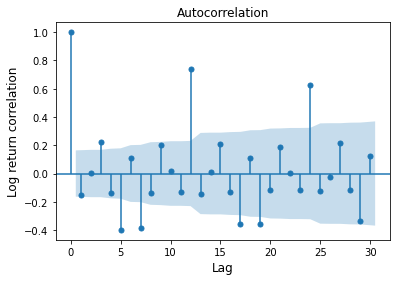

In [35]:
plot_acf(DE_data_log.diff().dropna(),lags= 30)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Log return correlation', fontsize=12)
plt.show()

Partial Auto-Correlation (PACF) : Partial Auto Correlation of lag k is the correlation between Y(t) and Y(t-k) when the effect of all other intermediate values (Y(t-1), Y(t-2),….Y(t-k+1)) is removed from both Y(t) and Y(t-k). For e.g. , partial auto correlation between y(t) and y(t+1) is the same as their autocorrelation cause there are no intermediate terms between them. Partial autocorrelation between y(t) and y(t+2) will remove the effect of y(t+1) from both y(t) and y(t+2). A plot of partial auto correlation for different values of k is called partial auto correlation plot.[1]

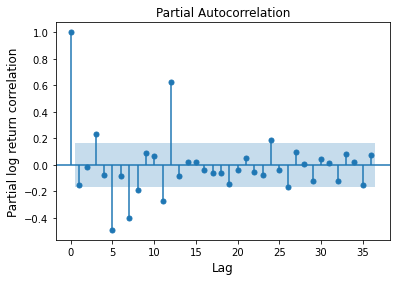

In [36]:
pacf_plot = plot_pacf(DE_data_log.diff().dropna(), lags= 36)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Partial log return correlation', fontsize=12)
plt.show()

In the ACF for log return values above, we see that all lags are almost within the highlighted area in blue, except for 12,24 lags.  This indicates that there is close to zero correlation between observations at different lags, except 12, 24 lags (strong seasonal component). 

According to the web sources [1]: If the autocorrelation at the seasonal lag k is positive (in our case k=12, 24) add a seasonal AR term (P) to the model. If the autocorrelation at the seasonal lag is negative, add a seasonal MA term (Q) to the model. 

In [37]:
DE['monthly_final_percent'][:120]

date
2010-01-31    0.000247
2010-02-28    0.000247
2010-03-31    0.000423
2010-04-30    0.000317
2010-05-31    0.000317
                ...   
2019-08-31    0.073294
2019-09-30    0.097725
2019-10-31    0.085510
2019-11-30    0.085510
2019-12-31    0.109941
Name: monthly_final_percent, Length: 120, dtype: float64

## 5. Seasonal Autoregressive Integrated Moving Average (SARIMA) for Germany low CO2 vehicles forecast

Now we can apply ARIMA model on log values with d=1 (first derivative), as we agreed that log return values of tiemseries object is stationary. ARIMA does not support seasonal data. As we implemented the strong seasonal component, it is recommended to apply SARIMA model, where S stands for Seasonal. We need to find parameteres p (for AR) and q (for MA) and P,D,Q for seasonal component. Seasonal ARIMA is a variation of ARIMA model. It is an extension of ARIMA method that supports seasonality in data.
There are three terms in ARIMA equation [2]:
1. AR : Auto Regression : The time series is regressed with its previous values i.e. y(t-1), y(t-2) etc. The order of the lag is denoted as p.
2. I : Integration : The time series uses differencing to make it stationary. The order of the difference is denoted as d. (we got first order differencing on log values (log return))
3. MA : Moving Average : The time series is regressed with residuals of the past observations i.e. error ε(t-1), error ε(t-2) etc. The order of the error lag is denoted as q.

In addition to the three parameters in ARIMA i.e. p, d, q, SARIMA has three more seasonal parameters (P, D, Q). The additional three parameters account for Autoregressive component (P), Differencing component (D) and Moving Average Component (Q) at the seasonal level.
It can be expressed as follows: ARIMA (p, d, q) (P, D, Q)m. 
Here m is number of observations per season (In our case, m is 12)

We used Auto Arima (auto.arima()) to find the best model for the given time series. We initialize the parameters p, P, q, Q as 0 and the max values is 4. As mentioned in the guidelines, we should not build a model with higher order of 2 for AR, MA, SAR, SMA parameters. Given the data is seasonal, here m is 12 and seasonal = ‘True’.

In [38]:
DE_model_parameteres = auto_arima(np.log(DE['monthly_final_percent']), start_p=0, start_q=0,
                          max_p=4, max_q=4,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=0,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=77.158, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-53.155, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11.982, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=80.260, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=75.914, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=11.961, Time=0.09 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-76.834, Time=1.52 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-78.799, Time=1.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.59 sec


The Akaike Information Critera (AIC) is a widely used measure of a statistical model. It basically quantifies 1) the goodness of fit, and 2) the simplicity of the model into a single statistic.

When comparing two models, the one with the lower AIC is generally “better”. 
Let's apply these parameteres.

The, we applied these parameteres on Germany low CO2 timeseries object for a period from 2010 to 2020. And 2021 data we used for calibration. We manualy changed P parameter to 1, as it gives better results.

In [39]:
DE_final_model = SARIMAX(np.log(DE['monthly_final_percent'][:132]),order=(0,1,0),seasonal_order=(1,0,1,12))
DE_result = DE_final_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62139D-01    |proj g|=  1.03876D+00

At iterate    5    f= -2.73917D-01    |proj g|=  1.27479D-01

At iterate   10    f= -2.75883D-01    |proj g|=  8.96468D-03

At iterate   15    f= -3.09267D-01    |proj g|=  3.49035D-01

At iterate   20    f= -3.20182D-01    |proj g|=  1.13255D-01

At iterate   25    f= -3.24703D-01    |proj g|=  1.72826D-02

At iterate   30    f= -3.25314D-01    |proj g|=  9.35738D-03

At iterate   35    f= -3.25318D-01    |proj g|=  4.06407D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


In [40]:
DE_forecasts_final = np.exp(DE_result.forecast(120))

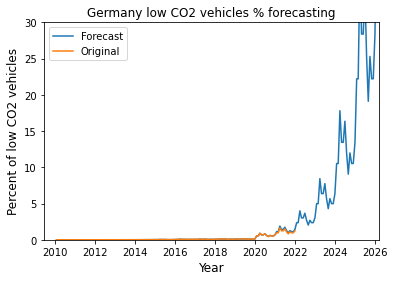

In [41]:
fig, ax = plt.subplots()
ax.plot(DE['monthly_final_percent'][:132].append(DE_forecasts_final), label='Forecast')
ax.plot(DE['monthly_final_percent'], label='Original')
ax.legend()
plt.title('Germany low CO2 vehicles % forecasting', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percent of low CO2 vehicles', fontsize=12)
plt.axis([14410, 20522, 0, 30])
plt.show()

Model fits 2021 dataset, however it is overestimated.

In [43]:
predictions = np.exp(DE_result.predict(start = DE['monthly_final_percent'].index[0], end = DE['monthly_final_percent'].index[-1]))

We also checked RMSE number.

In [44]:
arima_rmse = np.sqrt(mean_squared_error(DE['monthly_final_percent'].values, predictions)) 
arima_rmse

0.10432541449009214

We also can check model diagnostic diagrams. If the errors are normally distributed and are uncorrelated to each other, then we actually have a good model

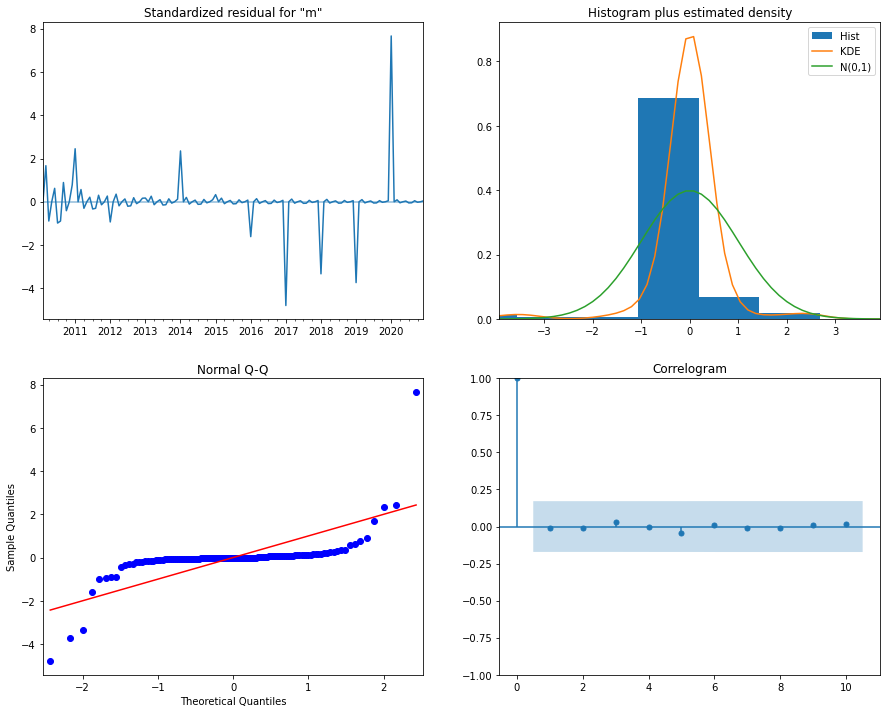

In [45]:
DE_result.plot_diagnostics(figsize=(15, 12))
plt.show()

The QQ-plot: the central part of the plot is almost flat, meaning that the data values varies slowly over a small range, while in the left and right parts of the plot they are varying more rapidly, over a large range - heavy-tailed?

And next step is to caluclate at each year the total sum and see when all the new vehicles in germany will be low CO2.

In [46]:
DE_forecast = DE_forecasts_final.to_frame()
DE_forecast = DE_forecast.reset_index()
DE_forecast.columns = ['Date','% low CO2']
DE_forecast.head(5)

,Date,% low CO2
0,2021-01-31,1.119026
1,2021-02-28,1.119026
2,2021-03-31,1.894231
3,2021-04-30,1.430291
4,2021-05-31,1.430291


In [47]:
DE_total_year = DE_forecast.groupby(DE_forecast.Date.dt.to_period("Y"))['% low CO2'].sum()

In [48]:
DE_total_year.loc[DE_total_year.values > 100] = 100

We applied same analyses for cluster calculation outcome for France, Italy and Spain.

## 6. France low CO2 vehicles share forecasting

In [49]:
FR = df[df['Country']=='FR']
FR = FR.reset_index().set_index('date')

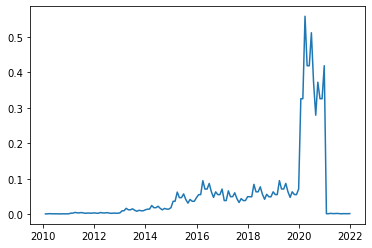

In [50]:
plt.plot(FR['monthly_final_percent'])
plt.show()

2021 prediction of low CO2 vehicles share based on supervised & unsupervised learnings is not correct.

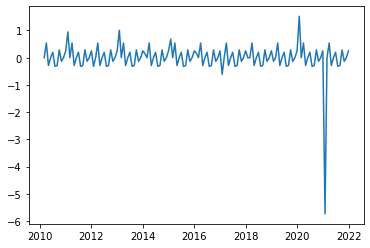

In [51]:
FR_data_log = np.log(FR['monthly_final_percent'])
plt.plot(FR_data_log.diff().dropna())
plt.show()

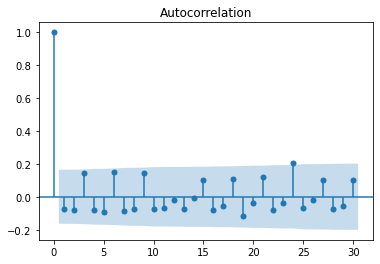

In [52]:
plot_acf(FR_data_log.diff().dropna(),lags= 30)
plt.show()

In [53]:
FR_model_parameteres = auto_arima(np.log(FR['monthly_final_percent']), start_p=0, start_q=0,
                          max_p=4, max_q=4,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=0,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=251.684, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=254.483, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=254.549, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=249.694, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=253.508, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=253.606, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=247.062, Time=0.24 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=218.561, Time=1.32 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=234.494, Time=0.66 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=220.446, Time=1.40 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=220.439, Time=1.72 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=222.546, Time=1.71 sec
 ARIMA(0,1,0)(2,0,1)[12]             : AI

In [54]:
FR_final_model = SARIMAX(np.log(FR['monthly_final_percent'][:132]),order=(0,1,0),seasonal_order=(1,0,1,24))
FR_result = FR_final_model.fit()
FR_forecasts_final = np.exp(FR_result.forecast(120))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.19357D-02    |proj g|=  1.43191D+00

At iterate    5    f= -6.90512D-02    |proj g|=  1.15695D-01

At iterate   10    f= -9.11365D-02    |proj g|=  1.61281D-01

At iterate   15    f= -9.92459D-02    |proj g|=  6.14339D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     28      1     0     0   1.111D-04  -9.925D-02
  F =  -9.9251953226706963E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


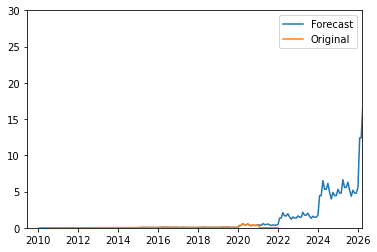

In [55]:
fig, ax = plt.subplots()
ax.plot(FR['monthly_final_percent'][:132].append(FR_forecasts_final), label='Forecast')
ax.plot(FR['monthly_final_percent'], label='Original')
ax.legend()
plt.axis([14410, 20522, 0, 30])
plt.show()

In [56]:
FR_forecast = FR_forecasts_final.to_frame()
FR_forecast = FR_forecast.reset_index()
FR_forecast.columns = ['Date','% low CO2']
FR_forecast.head(5)

,Date,% low CO2
0,2021-01-31,0.362753
1,2021-02-28,0.362753
2,2021-03-31,0.568068
3,2021-04-30,0.447130
4,2021-05-31,0.447130


In [57]:
FR_total_year = FR_forecast.groupby(FR_forecast.Date.dt.to_period("Y"))['% low CO2'].sum()
FR_total_year.loc[FR_total_year.values > 100] = 100

In [58]:
FR_total_year

Date
2021      5.018714
2022     18.491265
2023     19.705239
2024     60.109168
2025     63.497707
2026    100.000000
2027    100.000000
2028    100.000000
2029    100.000000
2030    100.000000
Freq: A-DEC, Name: % low CO2, dtype: float64

## 7. Italy low CO2 vehicles share forecasting

In [59]:
IT = df[df['Country']=='IT']
IT = IT.reset_index().set_index('date')

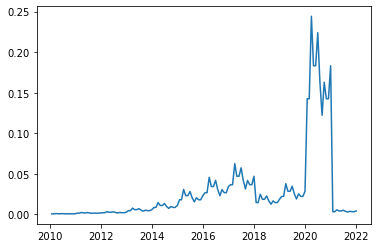

In [60]:
plt.plot(IT['monthly_final_percent'])
plt.show()

2021 prediction of low CO2 vehicles share based on supervised & unsupervised learnings is not correct.

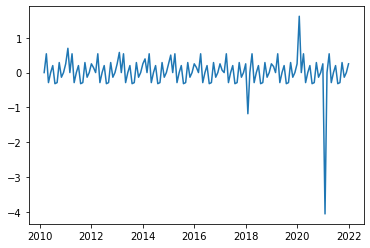

In [61]:
IT_data_log = np.log(IT['monthly_final_percent'])
plt.plot(IT_data_log.diff().dropna())
plt.show()

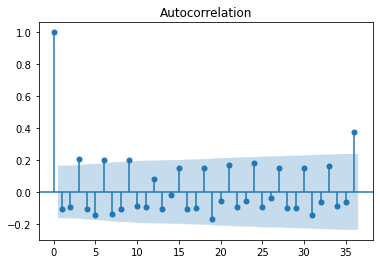

In [62]:
plot_acf(IT_data_log.diff().dropna(),lags= 36)
plt.show()

In [63]:
IT_model_parameteres = auto_arima(np.log(IT['monthly_final_percent']), start_p=0, start_q=0,
                          max_p=4, max_q=4,m=36,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=0,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[36] intercept   : AIC=190.406, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[36] intercept   : AIC=inf, Time=4.80 sec
 ARIMA(0,1,1)(0,0,1)[36] intercept   : AIC=inf, Time=12.67 sec
 ARIMA(0,1,0)(0,0,0)[36]             : AIC=188.547, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[36] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(0,0,1)[36] intercept   : AIC=inf, Time=8.67 sec
 ARIMA(0,1,0)(1,0,1)[36] intercept   : AIC=inf, Time=18.22 sec
 ARIMA(1,1,0)(0,0,0)[36] intercept   : AIC=190.823, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[36] intercept   : AIC=190.527, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[36] intercept   : AIC=192.406, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[36]          
Total fit time: 47.303 seconds


In [64]:
IT_final_model = SARIMAX(np.log(IT['monthly_final_percent'][:132]),order=(0,1,0),seasonal_order=(2,0,2,12))
IT_result = IT_final_model.fit()
IT_forecasts_final = np.exp(IT_result.forecast(120))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79950D+00    |proj g|=  2.85798D+02


 This problem is unconstrained.



At iterate    5    f= -2.82324D-02    |proj g|=  1.00154D+00

At iterate   10    f= -5.86902D-02    |proj g|=  1.33147D-01

At iterate   15    f= -6.33581D-02    |proj g|=  8.12000D-02

At iterate   20    f= -9.43535D-02    |proj g|=  2.04298D-01

At iterate   25    f= -1.12086D-01    |proj g|=  1.06789D-01

At iterate   30    f= -1.35391D-01    |proj g|=  9.00627D-02

At iterate   35    f= -1.38840D-01    |proj g|=  7.41136D-03

At iterate   40    f= -1.40083D-01    |proj g|=  1.08602D-02

At iterate   45    f= -1.40611D-01    |proj g|=  3.67575D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     67   

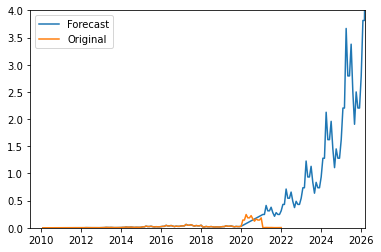

In [65]:
fig, ax = plt.subplots()
ax.plot(IT['monthly_final_percent'][:120].append(IT_forecasts_final), label='Forecast')
ax.plot(IT['monthly_final_percent'], label='Original')
ax.legend()
plt.axis([14410, 20522, 0, 4])
plt.show()

In [66]:
IT_forecast = IT_forecasts_final.to_frame()
IT_forecast = IT_forecast.reset_index()
IT_forecast.columns = ['Date','% low CO2']
IT_forecast.head(5)

,Date,% low CO2
0,2021-01-31,0.245576
1,2021-02-28,0.245576
2,2021-03-31,0.410758
3,2021-04-30,0.312140
4,2021-05-31,0.312140


In [67]:
IT_total_year = IT_forecast.groupby(IT_forecast.Date.dt.to_period("Y"))['% low CO2'].sum()
IT_total_year.loc[IT_total_year.values > 100] = 100

In [68]:
IT_total_year

Date
2021      3.477390
2022      6.070462
2023     10.419728
2024     18.078035
2025     31.142009
2026     53.884353
2027     92.950465
2028    100.000000
2029    100.000000
2030    100.000000
Freq: A-DEC, Name: % low CO2, dtype: float64

## 8. Spain low CO2 vehicles share forecasting

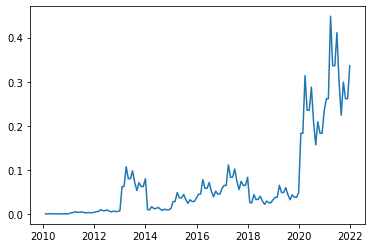

In [69]:
ES = df[df['Country']=='ES']
ES = ES.reset_index().set_index('date')
plt.plot(ES['monthly_final_percent'])
plt.show()

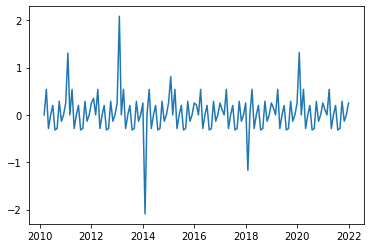

In [70]:
ES_data_log = np.log(ES['monthly_final_percent'])
plt.plot(ES_data_log.diff().dropna())
plt.show()

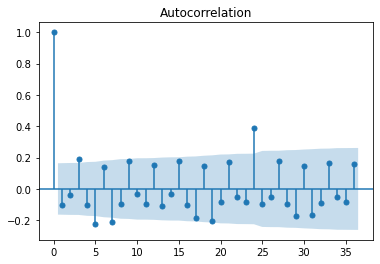

In [71]:
plot_acf(ES_data_log.diff().dropna(),lags= 36)
plt.show()

In [72]:
ES_model_parameteres = auto_arima(np.log(IT['monthly_final_percent']), start_p=0, start_q=0,
                          max_p=4, max_q=4,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=0,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=190.406, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=191.566, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=191.792, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=188.547, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=190.530, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=191.147, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=174.000, Time=0.18 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=150.125, Time=1.10 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=182.849, Time=0.67 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=152.019, Time=1.34 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=152.015, Time=1.27 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=154.120, Time=1.43 sec
 ARIMA(0,1,0)(2,0,1)[12]             : AI

In [73]:
ES_final_model = SARIMAX(np.log(ES['monthly_final_percent'][:132]),order=(0,1,0),seasonal_order=(2,0,1,12))
ES_result = ES_final_model.fit()
ES_forecasts_final = np.exp(ES_result.forecast(120))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61911D-01    |proj g|=  2.59310D+00

At iterate    5    f=  4.40048D-01    |proj g|=  3.05983D-01

At iterate   10    f=  3.83127D-01    |proj g|=  3.62637D-02

At iterate   15    f=  3.72997D-01    |proj g|=  2.37896D-01


 This problem is unconstrained.



At iterate   20    f=  3.67144D-01    |proj g|=  5.86038D-02

At iterate   25    f=  3.65237D-01    |proj g|=  1.80954D-02

At iterate   30    f=  3.64833D-01    |proj g|=  3.85099D-03

At iterate   35    f=  3.64774D-01    |proj g|=  7.76481D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     51      1     0     0   7.765D-04   3.648D-01
  F =  0.36477404640218486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


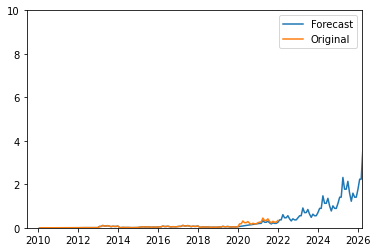

In [74]:
fig, ax = plt.subplots()
ax.plot(ES['monthly_final_percent'][:120].append(ES_forecasts_final), label='Forecast')
ax.plot(ES['monthly_final_percent'], label='Original')
ax.legend()
plt.axis([14410, 20522, 0, 10])
plt.show()

In [75]:
ES_forecast = ES_forecasts_final.to_frame()
ES_forecast = ES_forecast.reset_index()
ES_forecast.columns = ['Date','% low CO2']
ES_forecast.head(5)

,Date,% low CO2
0,2021-01-31,0.203075
1,2021-02-28,0.203075
2,2021-03-31,0.329997
3,2021-04-30,0.254665
4,2021-05-31,0.254665


In [76]:
ES_total_year = ES_forecast.groupby(IT_forecast.Date.dt.to_period("Y"))['% low CO2'].sum()
ES_total_year.loc[ES_total_year.values > 100] = 100

In [77]:
ES_total_year

Date
2021      2.846220
2022      5.147759
2023      7.801451
2024     12.568320
2025     19.817757
2026     31.474362
2027     49.849794
2028     79.008474
2029    100.000000
2030    100.000000
Freq: A-DEC, Name: % low CO2, dtype: float64

## 9. Plotting results for Germany, France, Italy and Spain on yearly basis

In [78]:
frame = { 'Germany': DE_total_year, 'France': FR_total_year, 'Italy': IT_total_year,'Spain': ES_total_year}
final_df = pd.DataFrame(frame)
final_df.head(5)

,Germany,France,Italy,Spain
Date,,,,
2021,15.913546,5.018714,3.477390,2.846220
2022,33.594859,18.491265,6.070462,5.147759
2023,70.911679,19.705239,10.419728,7.801451
2024,100.000000,60.109168,18.078035,12.568320
2025,100.000000,63.497707,31.142009,19.817757


In [79]:
final_df.index=final_df.index.to_series().astype(str)

In [80]:
final_df = final_df.reset_index()

In [81]:
final_df

,Date,Germany,France,Italy,Spain
0,2021,15.913546,5.018714,3.477390,2.846220
1,2022,33.594859,18.491265,6.070462,5.147759
2,2023,70.911679,19.705239,10.419728,7.801451
3,2024,100.000000,60.109168,18.078035,12.568320
4,2025,100.000000,63.497707,31.142009,19.817757
5,2026,100.000000,100.000000,53.884353,31.474362
6,2027,100.000000,100.000000,92.950465,49.849794
7,2028,100.000000,100.000000,100.000000,79.008474
8,2029,100.000000,100.000000,100.000000,100.000000
9,2030,100.000000,100.000000,100.000000,100.000000


In [82]:
alt_df = final_df.melt(id_vars=['Date'],var_name ='Country', value_name='% low CO2 vehicles')

In [83]:
alt_df.head()

,Date,Country,% low CO2 vehicles
0,2021,Germany,15.913546
1,2022,Germany,33.594859
2,2023,Germany,70.911679
3,2024,Germany,100.000000
4,2025,Germany,100.000000


In [84]:
final_chart = alt.Chart(alt_df, title = 'Forecast of low CO2 emission vehicles percentage in new regitsrations by 2030').mark_bar().encode(
    x=alt.X('Country:O', title = 'Country', sort=['Spain', 'Italy', 'France', 'Germany']),
    y=alt.Y('% low CO2 vehicles:Q', title = 'Percentage of low CO2 emission vehicles'),
    color=alt.Color('Country:N', scale=alt.Scale(range=['green', 'blue', 'orange', 'red'])),
    column=alt.Column('Date:N', title = 'Year')
).properties(width=50).configure_title(fontSize=16)

In [85]:
final_chart

alt.Chart(...)

## References:

1: https://towardsdatascience.com/introduction-to-time-series-forecasting-part-2-arima-models-9f47bf0f476b

2: https://people.duke.edu/~rnau/411arim.htm